In [83]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [84]:
data, batch, node_dist, unique_edges = torch.load('/storage/ryoji/Graph-Transformer/NBFNet-PyG/RWDropout/NBFNet/WN18RR/2024-12-05-12-11-46/node_dists.pt')

id2entity, id2relation = torch.load('/storage/ryoji/Graph-Transformer/NBFNet-PyG/wn18rr_id2name.pt')

In [85]:
node_dist.max(0)

torch.return_types.max(
values=tensor([1.], device='cuda:2', dtype=torch.float64),
indices=tensor([39722], device='cuda:2'))

In [86]:
id2entity[39722]

'iron_out.v.01'

In [91]:
src = unique_edges[0]
tgt = unique_edges[1]
edge_prob = (node_dist[src]+node_dist[tgt])/2
# edge_prob = (node_dist[src]*node_dist[tgt])
edge_prob = edge_prob.to('cpu')
# edge_prob = torch.exp(edge_prob)-1

In [92]:
boundaries = torch.linspace(0, edge_prob.max().item(), steps=1000)
out = torch.bucketize(edge_prob, boundaries, right=False)
out, count = torch.unique(out, return_counts=True)

max_count = 1000
clipped_count = torch.where(count > max_count, max_count, count)



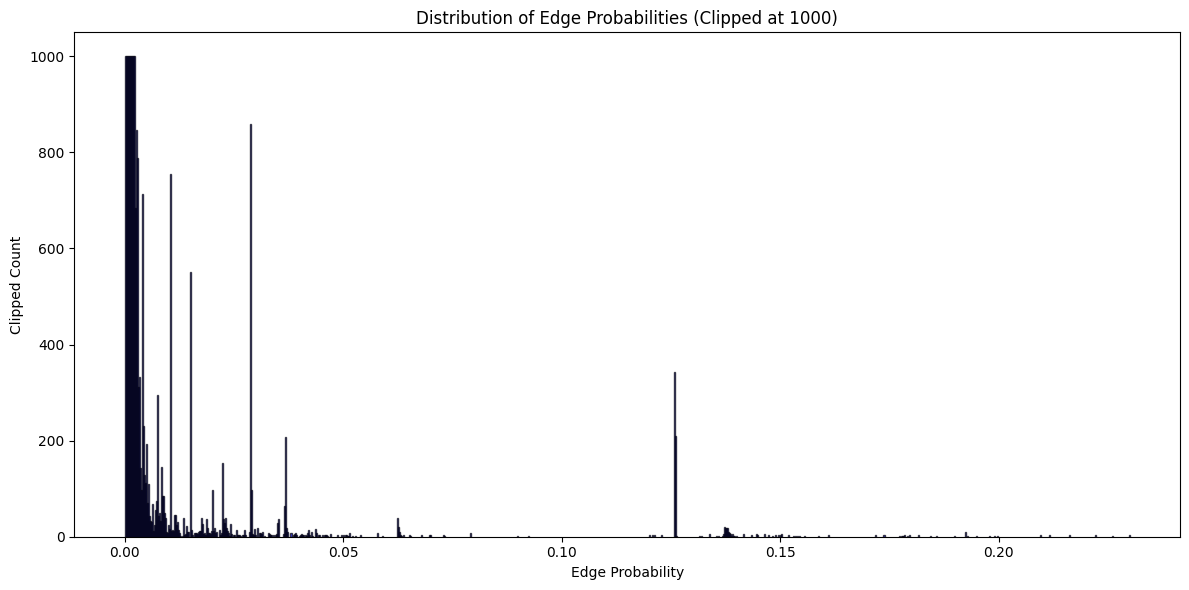

In [93]:
# Convert torch tensors to numpy arrays for plotting
x_values = boundaries[out].numpy()
y_values = clipped_count.numpy()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, width=boundaries[1]-boundaries[0], align='edge', alpha=0.7, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Edge Probability')
plt.ylabel('Clipped Count')
plt.title('Distribution of Edge Probabilities (Clipped at 1000)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [94]:
from scipy.stats import beta
mu = edge_prob.mean()
var = edge_prob.var()
a = 4
b = 1
edge_imp = beta.cdf(edge_prob.to('cpu'), a=a, b=b)
edge_imp = torch.tensor(edge_imp)

boundaries = torch.linspace(0, 1, steps=1000)
out = torch.bucketize(edge_imp, boundaries, right=False)
out, count = torch.unique(out, return_counts=True)

max_count = 1000
clipped_count = torch.where(count > max_count, max_count, count)

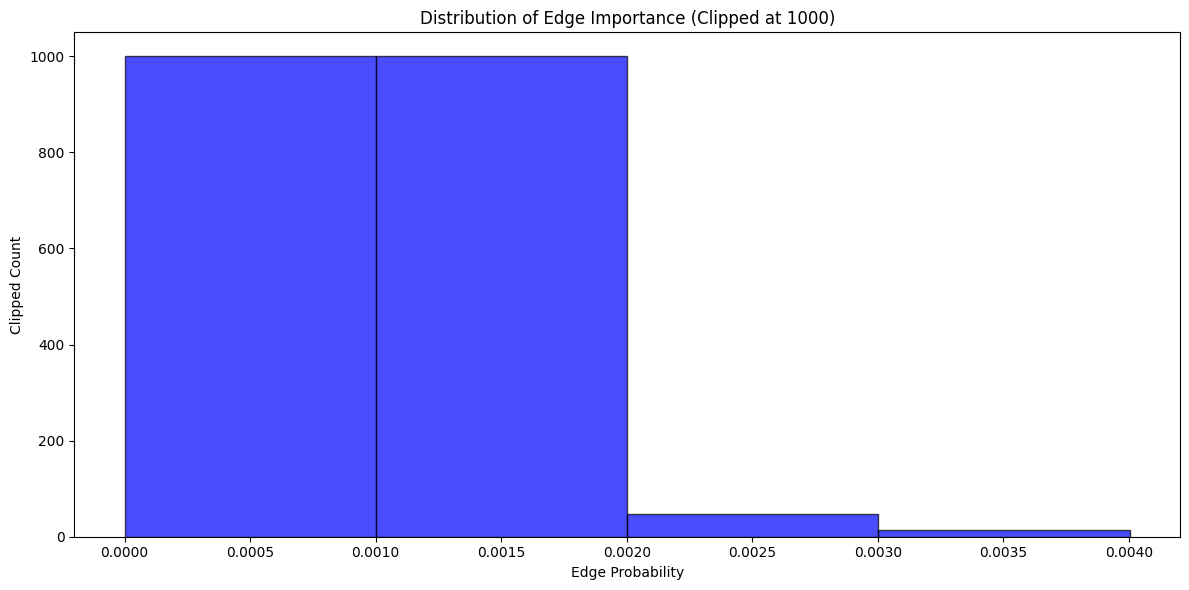

In [82]:
# Convert torch tensors to numpy arrays for plotting
x_values = boundaries[out].numpy()
y_values = clipped_count.numpy()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, width=boundaries[1]-boundaries[0], align='edge', alpha=0.7, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Edge Probability')
plt.ylabel('Clipped Count')
plt.title('Distribution of Edge Importance (Clipped at 1000)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()